<a href="https://colab.research.google.com/github/ecealptekin/Decision-tree-and-K-NN/blob/master/ecealptekin_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# You can find the data under https://drive.google.com/drive/folders/1e550az93U3_kfRBbVY5PZnMKYwGYmHqi?usp=sharing

import pandas as pd
import numpy as np

train_label = pd.read_csv('/content/drive/My Drive/HW1/train_label.csv')
train_data = pd.read_csv('/content/drive/My Drive/HW1/train_data.csv')

test_data = pd.read_csv("/content/drive/My Drive/HW1/test_data.csv")
test_label = pd.read_csv("/content/drive/My Drive/HW1/test_label.csv")

In [0]:
# show random samples from the training data

train_data.sample(5)

,id,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,f_worker,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_guarantor,other_parties_none,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes
471,472,6,448,4,4,23,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0
114,115,12,1680,3,1,35,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0
167,168,11,1577,4,1,20,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0
76,77,42,3965,4,3,34,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0
646,647,30,4583,2,2,32,2,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0


# Train Decision Tree with default parameters

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree using the whole training data with **entropy** criteria
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(train_data,train_label)

# Estimate the prediction of test data
test_pred = clf.predict(test_data)

# Calculate accuracy of test data
from sklearn.metrics import accuracy_score
TestAcc = accuracy_score(test_label,test_pred)
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 67.63285%


# FineTune Decision Tree parameters

1- Spliting dataset into train and validation 

In [0]:
# Split training data to 70% training and 30% validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data,train_label,test_size = 0.3)

2- FineTune minimum sample split

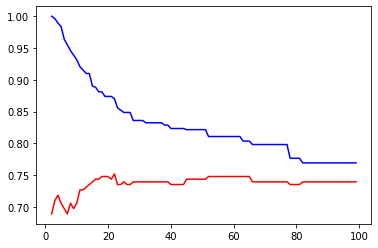

In [0]:
min_samples_splits = range(2, 100)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:
  
  # Fit the tree using the 70% portion of the training data
  dt = DecisionTreeClassifier(min_samples_split=min_samples_split, criterion='entropy')
  dt.fit(x_train, y_train)
  
  # Evaluate on Training set
  train_pred = dt.predict(x_train)
  train_acc = accuracy_score(y_train, train_pred)
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_pred = dt.predict(x_val)
  val_acc = accuracy_score(y_val, val_pred)
  val_results.append(val_acc)
  
# Ploting
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [0]:
# Choose the best minimum split sample based on the plot
Best_minSampl = np.argmax(val_results)

# Train decision tree using the full training data and the best minimum split sample
dt = DecisionTreeClassifier(min_samples_split=Best_minSampl, criterion='entropy')
clf = dt.fit(train_data, train_label)

# Estimate the prediction of the test data
test_pred = clf.predict(test_data)

# Calculate accuracy of test data
TestAcc = accuracy_score(test_label, test_pred)
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 69.56522%


# Now, apply the same procedure but using KNN instead of decision tree 

# For finetuning, find the best value of K to use with this dataset.

In [0]:
# Write your code here

from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = range(1, 30, 2)

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:

  # Follow what we did in decision tree part
   model = KNeighborsClassifier(n_neighbors=k)
   model.fit(x_train, y_train)
   score = model.score(x_val, y_val)
   print("For k = %d, validation accuracy = %.5f%%" % (k, score * 100))
   accuracies.append(score)

# Train KNN using the full training data with the best K that you found
i = np.argmax(accuracies)
print("best k = %d with %.5f%% validation accuracy" % (kVals[i], accuracies[i] * 100))
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(train_data, train_label)
predictions = model.predict(test_data)


# Testing
from sklearn.metrics import accuracy_score
TestAccuracy = accuracy_score(test_label, predictions)
print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100))   


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr

For k = 1, validation accuracy = 60.20151%
For k = 3, validation accuracy = 64.23174%
For k = 5, validation accuracy = 66.49874%
For k = 7, validation accuracy = 66.49874%
For k = 9, validation accuracy = 68.51385%
For k = 11, validation accuracy = 68.26196%
For k = 13, validation accuracy = 67.75819%
For k = 15, validation accuracy = 67.25441%
For k = 17, validation accuracy = 67.50630%
For k = 19, validation accuracy = 67.50630%
For k = 21, validation accuracy = 68.26196%
For k = 23, validation accuracy = 68.26196%
For k = 25, validation accuracy = 67.75819%
For k = 27, validation accuracy = 68.01008%
For k = 29, validation accuracy = 68.26196%
best k = 9 with 68.51385% validation accuracy
Testing Accuracy = 71.01449%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr

# Bonus

# Apply gridsearch using decision tree on any hyperparameter(s) of your choice, you have to beat your previous obtained accuracies to get the bonus


In [0]:
# Write your code here
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

x_train, x_val, y_train, y_val = train_test_split(train_data,train_label,test_size = 0.5)
params = {"n_neighbors": np.arange(1, 41, 2),
	"metric": ["euclidean"]}

model = KNeighborsClassifier(n_jobs=None)
grid = GridSearchCV(model, params)
start = time.time()
grid.fit(train_data, train_label)

# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(time.time() - start))
acc = grid.score(test_data, test_label)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(grid.best_params_))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[INFO] grid search took 1.31 seconds
[INFO] grid search accuracy: 70.53%
[INFO] grid search best parameters: {'metric': 'euclidean', 'n_neighbors': 29}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# Report: Write a summary of your approach to this problem; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what decision trees are, assuming they are known to people in your research area).

Must include statements such as:


*   Include the problem definition: 1-2 lines
*   Talk about train/val/test sets, size and how split.
*   State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data…."
*   Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)



# Write your report in this cell

The problem is classifying a person as good or bad credit risks according to set of attributes. The dataset contains 1000 entries with 20 categorical attributes. I applied same method, which is converting from 2d to 1d and shuffling, to my train data for both algorithms K-NN and decision tree. In this task train data splitted %70 for training %30 for validating. When I train dataset with default parameters, I get the result : Testing Accuracy = 67.63285%. Shuffling the data before splitting make accuracy score higher and we get better results. These two algorithms take parameters. In k-nn algorithm , the k is different for each data set. Therefore, we cannot set the k value as a constant. In this task I tried the key values, which are odd and between 1 and 30. When k=9,the score is 71.01449%. This k value gives the best score.
In decision tree, "min_samples_split" is the minimum number of samples needed to split an internal node. The testing accuracy is 69.56522%.


..

..